<a href="https://colab.research.google.com/github/alliezom/ISAT_300/blob/main/Lab1_ResistorAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/TobGerken/ISAT300/blob/main/LabNotebooks/Lab1_ResistorAnalysis.ipynb)

<font color ='green'>**Allie Zombron**</font>

## **Lab 1 Resistor Analysis**

This notebook provides some sample code on getting started with the analysis for this week's lab using python.

## Learning Goals

After completing this data analysis exercise you should be able to

- Create a pandas dataframe with your Lab 1 data
- Calculate the deviation from the nominal resistance
- Make a histogram plot and modify the plot for inclusion into the lab report.

#### This notebook assumes that you have worked through the previous exercises during the lecture

1. [GettingStarted](https://github.com/TobGerken/ISAT300/blob/main/1_GettingStarted.ipynb)
1. [DataVisualization](https://github.com/TobGerken/ISAT300/blob/main/1_DataVisualization.ipynb)

In [8]:
import pandas as pd

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



---



## Measurement of the Resistance of Resistors
Measurement of the amount of deviation above the nominal resistor value (if the measured value is greater than the nominal value), or the amount of deviation below the nominal resistor value (if the measured value is less than the nominal value)

In [12]:
df = pd.read_csv('/content/Lab_1_Data/Lab 1 - Resistors.csv')
df

,Resistor Number,Measured Resistance (Ω)
0,1,984
1,2,986
2,3,982
3,4,982
4,5,988
5,6,984
6,7,984
7,8,981
8,9,981
9,10,988


In [15]:
# defining 'Actual Resistance'
# nominal_resistance is the og value aka 'Actual Resistance'
df['Actual Resistance'] = 1000

# Deviation above the nominal resistor value (measured > nominal)
df["Deviation Above"] = df["Measured Resistance (Ω)"] - df["Actual Resistance"]

# Deviation below the nominal resistor value (measured < nominal)
df["Deviation Below"] = df["Actual Resistance"] - df["Measured Resistance (Ω)"]

# Set invalid deviations to 0
df.loc[df["Deviation Above"] < 0, "Deviation Above"] = 0
df.loc[df["Deviation Below"] < 0, "Deviation Below"] = 0

# Print the correct DataFrame columns
df[["Resistor Number", "Actual Resistance", "Measured Resistance (Ω)", "Deviation Above", "Deviation Below"]]

,Resistor Number,Actual Resistance,Measured Resistance (Ω),Deviation Above,Deviation Below
0,1,1000,984,0,16
1,2,1000,986,0,14
2,3,1000,982,0,18
3,4,1000,982,0,18
4,5,1000,988,0,12
5,6,1000,984,0,16
6,7,1000,984,0,16
7,8,1000,981,0,19
8,9,1000,981,0,19
9,10,1000,988,0,12


### Max deviation **above** the nominal resistor value & Max deviation **below** the resistor value

In [16]:
max_deviation_above = df["Deviation Above"].max()
max_deviation_below = df["Deviation Below"].max()
print(f"Max deviation above: {max_deviation_above} Ω")
print(f"Max deviation below: {max_deviation_below} Ω")

Max deviation above: 0 Ω
Max deviation below: 20 Ω


In [17]:
# range of resistance
# min value = 980
# max value = 992
range = 992 - 980
print(range)

12


<font color = "blue"> Looking at the deviation data, the values do fall within the limits of the nominal tolerance indicated by the 4th band </font>

### **Histogram of the 30 measured resistances**

Review the [documentation page](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) for the `plot()` function to see how you can modify the histogram below.

You should try giving the plot an appropriate `title`, as well as a labels for the x and y axes.

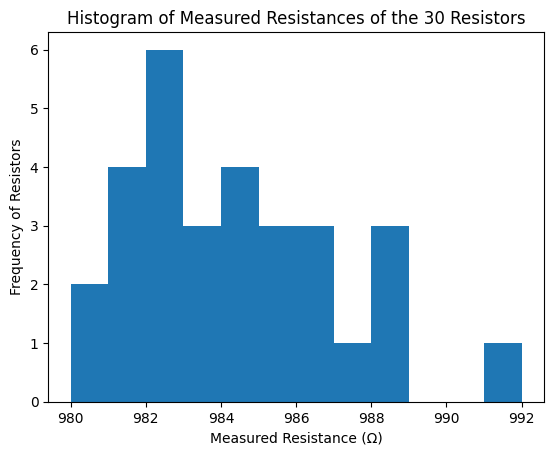

In [18]:
# the below code will produce a simple histogram
# modify this code in a way that it shows, what you want it to show
# try different numbers for the bins and see what this does.
# df.plot(kind = 'hist', x = 'Resistance', xlabel = 'Test', bins = 10)

import matplotlib.pyplot as plt

plt.hist(df['Measured Resistance (Ω)'], bins = 12)
plt.title('Histogram of Measured Resistances of the 30 Resistors')
plt.xlabel('Measured Resistance (Ω)')
plt.ylabel('Frequency of Resistors')
plt.show()



---


### Resistance of 10 DMMs

In [20]:
df = pd.read_csv('/content/Lab_1_Data/Lab 1 - ten measurements of the exact resistor on ten different DMMs  (1).csv')
df

,DMM Number,Measured Resistance (Ω)
0,1,1001
1,2,995
2,3,996
3,4,1001
4,5,1000
5,6,1000
6,7,1000
7,8,999
8,9,1000
9,10,1000


In [21]:
# range over which the measured resistances vary
range = df['Measured Resistance (Ω)'].max() - df['Measured Resistance (Ω)'].min()
print(f"Range of Measured Resistances: {range} Ω")

Range of Measured Resistances: 6 Ω


In [22]:
# average of the 10 resistances on the same resistor
avg= df['Measured Resistance (Ω)'].mean()
print(f"Average of the 10 resistances: {avg} Ω")

Average of the 10 resistances: 999.2 Ω


**How does the average value of the 10 measured resistances compare to the nominal value for that resistor?**

`Avg of 10 resistors = 999.2 Ω`

`Nominal resistance = 1000 Ω`

1000 - 999.2 = 0.8 Ω = 0.08%

Since the difference of the average versus the nominal value of the resistor is 0.08%, that means that the average resistance is very close to the nominal value of the resistor.

The tolerance of the resistor was +/- 5%, which means that all values were within it.

`max tolerance: 1000 + 5% = 1050`

`min tolerance: 1000 - 5% = 950`



---



### Resistors in Series and Parallel on a Breadboard

### Voltage drop across the three resistors in **series**

In [23]:
series_resistor = {
    'Resistance (kΩ)': ['1', '2.2', '3.3'],
    'Voltage (V)': ['1.84', '4.76', '6.07']
}
pd.DataFrame(series_resistor)

,Resistance (kΩ),Voltage (V)
0,1,1.84
1,2.2,4.76
2,3.3,6.07


In [24]:
total_series_voltage = 1.84 + 4.76 + 6.07
print(f"Total voltage across series resistors: {total_series_voltage} V")

Total voltage across series resistors: 12.67 V


### Voltage drop across the three resistors in **parallel**

In [25]:
parallel_resistor = {
    'Resistance (kΩ)': ['1', '2.2', '3.3'],
    'Voltage (V)': ['12', '12', '12']
}
pd.DataFrame(parallel_resistor)

,Resistance (kΩ),Voltage (V)
0,1,12
1,2.2,12
2,3.3,12




---

